In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import time

def count_flops(model, input_shape):
    # Create a dummy input tensor
    x = tf.keras.backend.random_normal(input_shape)
    
    # Use the model to get the output
    model(x)  # Forward pass to initialize the model

    # Calculate the FLOPs manually
    flops = 0
    for layer in model.layers:
        if isinstance(layer, Conv2D):
            kernel_size = layer.kernel_size[0] * layer.kernel_size[1] * layer.input_shape[-1]
            output_size = layer.output_shape[1] * layer.output_shape[2] * layer.filters
            flops += kernel_size * output_size * 2  # Multiply and accumulate
        elif isinstance(layer, Dense):
            flops += layer.input_shape[-1] * layer.output_shape[-1] * 2  # Multiply and accumulate
    return flops

def calculate_mips(flops, inference_time):
    mips = flops / (inference_time * 1e6)  # Convert to million
    return mips

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Count FLOPs
input_shape = (1, 28, 28, 1)  # Batch size of 1
flops = count_flops(model, input_shape)

# Measure inference time
dummy_input = tf.random.normal((1, 28, 28, 1))
start_time = time.time()
model.predict(dummy_input)
inference_time = time.time() - start_time

# Calculate MIPS
mips = calculate_mips(flops, inference_time)

# Print the results
print(f"FLOPs: {flops / 1e6:.2f} million")
print(f"MIPS: {mips:.2f} million")

1/1 [==============================] - 0s 109ms/step
FLOPs: 5.06 million
MIPS: 30.71 million


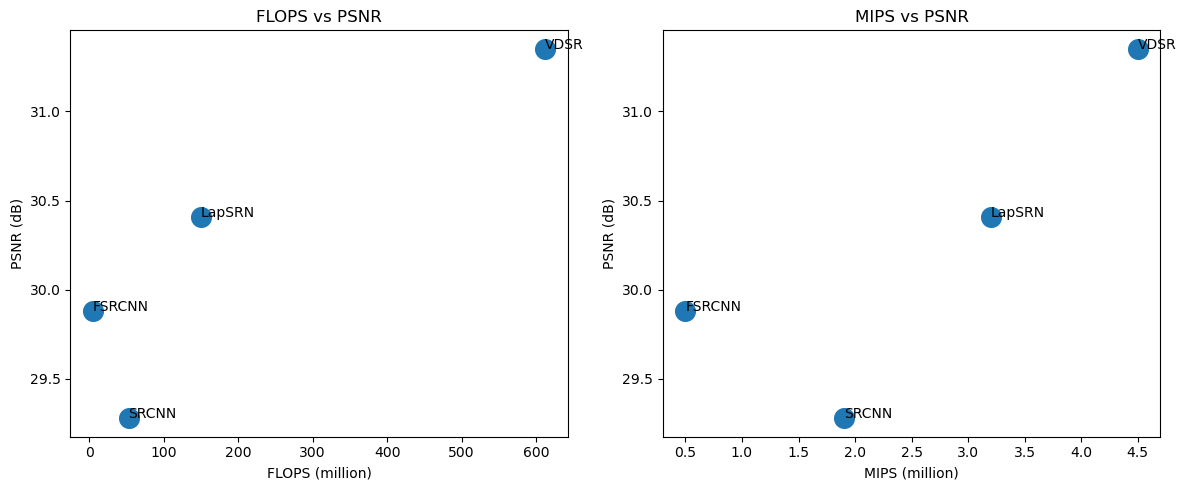

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance data
models = ['SRCNN', 'FSRCNN', 'VDSR', 'LapSRN']
flops = [52.6, 4.6, 612.6, 149.4]  # in millions
mips = [1.9, 0.5, 4.5, 3.2]  # in millions
psnr = [29.28, 29.88, 31.35, 30.41]  # in dB

# Create figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# FLOPS vs PSNR bubble chart
ax1.scatter(flops, psnr, s=200)
for i, txt in enumerate(models):
    ax1.annotate(txt, (flops[i], psnr[i]), fontsize=10)
ax1.set_xlabel('FLOPS (million)')
ax1.set_ylabel('PSNR (dB)')
ax1.set_title('FLOPS vs PSNR')

# MIPS vs PSNR bubble chart 
ax2.scatter(mips, psnr, s=200)
for i, txt in enumerate(models):
    ax2.annotate(txt, (mips[i], psnr[i]), fontsize=10)
ax2.set_xlabel('MIPS (million)')
ax2.set_ylabel('PSNR (dB)')
ax2.set_title('MIPS vs PSNR')

plt.tight_layout()
plt.show()